<a href="https://colab.research.google.com/github/souradipta93/Predictive_Analytics/blob/main/SVM_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SVM-Example-BlueorRed

In [ ]:
#Import Core Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read the file
mydata=pd.read_csv("BlueOrRed.csv")
mydata.head()

,Undecided,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,1,51,1,1,1,4,171.0,15,0
1,1,37,1,1,1,3,96.0,18,0
2,1,53,1,1,1,6,86.0,20,0
3,0,33,1,1,1,2,176.0,18,1
4,0,46,1,1,1,6,420.0,15,1


In [ ]:
#Define X and Y
X=mydata.iloc[:,1:9]
Y=mydata["Undecided"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
X_train.shape
#Y_train.shape

(7000, 8)

In [ ]:
#Build the SVM Model for linear kernel
svc_model=SVC(kernel="linear",probability=True)
SVM1=svc_model.fit(X_train,Y_train)
#SVM1.decision_function(X_train)
#SVM1
weight=SVM1.coef_
print(weight)
Intercept=SVM1.intercept_
print(Intercept)
print(SVM1)
SVM_Scores=(SVM1.decision_function(X_train))
SVM_Scores=pd.DataFrame(SVM_Scores)
SVM_Scores.columns=["Scores"]
SVM_Scores


[[-0.01228814  0.33185877  1.11958069  0.04370275  0.14411422 -0.00374056
   0.17316228 -1.85541933]]
[-3.14487192]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


,Scores
0,-1.000186
1,1.083754
2,-0.061469
3,-0.449887
4,-0.490850
5,-0.582499
6,-1.059156
7,-1.075000
8,-0.784201
9,-1.349156


In [ ]:
#Overall Accuracy,recall,precision
Prediction=SVM1.predict(X_train)
print("Accuracy=","{:.4f}".format(accuracy_score(Y_train,Prediction)))
print("Recall=","{:.4f}".format(recall_score(Y_train,Prediction)))
print("Precision","{:.4f}".format(precision_score(Y_train,Prediction)))

Accuracy= 0.7857
Recall= 0.6122
Precision 0.8081


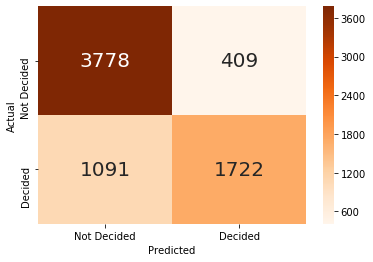

In [ ]:
#Getting Confusion Matrix
confusion=confusion_matrix(Y_train,Prediction)
sns.heatmap(confusion,annot=True,cmap="Oranges",annot_kws={"size":20},fmt="0.0f",
           xticklabels=["Not Decided","Decided"],
           yticklabels=["Not Decided","Decided"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
#Getting Probabilities
Probability=SVM1.predict_proba(X_train)
Probability=pd.DataFrame(Probability)
Probability

,0,1
0,0.694745,0.305255
1,0.216176,0.783824
2,0.467979,0.532021
3,0.565768,0.434232
4,0.575840,0.424160
5,0.597991,0.402009
6,0.707261,0.292739
7,0.710572,0.289428
8,0.644364,0.355636
9,0.764191,0.235809


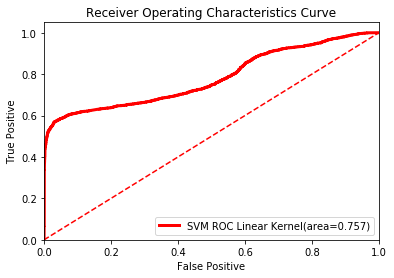

In [ ]:
#ROC Curve
svmroc=roc_auc_score(Y_train,Prediction)
fpr,tpr,thresholds=roc_curve(Y_train,Probability[1])
plt.figure()
plt.plot(fpr,tpr,color="red",lw=3,label="SVM ROC Linear Kernel(area=%0.3f)" %svmroc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Overall Accuracy,recall,precision
Prediction=SVM1.predict(X_test)
print("Accuracy=","{:.4f}".format(accuracy_score(Y_test,Prediction)))
print("Recall=","{:.4f}".format(recall_score(Y_test,Prediction)))
print("Precision","{:.4f}".format(precision_score(Y_test,Prediction)))

Accuracy= 0.7843
Recall= 0.6020
Precision 0.8105


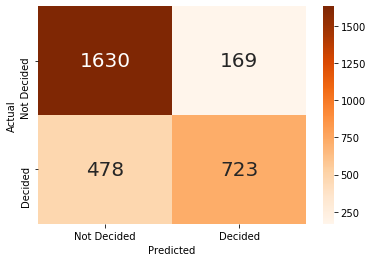

In [ ]:
#Getting Confusion Matrix-test Data
confusion=confusion_matrix(Y_test,Prediction)
sns.heatmap(confusion,annot=True,cmap="Oranges",annot_kws={"size":20},fmt="0.0f",
           xticklabels=["Not Decided","Decided"],
           yticklabels=["Not Decided","Decided"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
#Test Data Performance
